In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\mateu\AppData\Local\Temp\ipykernel_4876\4220532861.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from sklearn.base import RegressorMixin
from typing       import Literal
class RidgeRegressor(RegressorMixin):
    theta = None
    def __init__(self,alpha=0.1,solver:Literal['normal','stocastic']='normal', n_epochs=50,t0 = 5,t1=50):
        self.alpha    = alpha
        self.solver   = solver
        self.n_epochs = n_epochs
        self.t0       = t0
        self.t1       = t1

    def condition(self,vetor):
        if np.any(np.isnan(vetor)):    return True
        if np.any(np.isinf(vetor)):    return True
        if np.any(np.isneginf(vetor)): return True
        if np.any(np.isposinf(vetor)): return True
        return False


    def fit(self,X,y):
        
        m  = np.size(X,axis=0)
        Xb = np.c_[ np.ones((m,1)), X]

        match self.solver:
            case 'normal':
                A  = np.identity(np.size(Xb,axis=1))
                self.theta = np.linalg.inv(Xb.T.dot(Xb) + self.alpha*A).dot(Xb.T).dot(y)

    def predict(self,X):   
        soma = 0  
        tam  = np.size(X,axis=1)
        if (tam > 1):
            for i in range(tam):
                soma += self.theta[i+1] * X[:,i] 
            return self.theta[0] + soma
        return self.theta[0] + self.theta[1] * X

In [3]:
data = pd.read_csv('dataset/Salário.csv')
Y = data['Salario']
X = data['Experiencia'] 

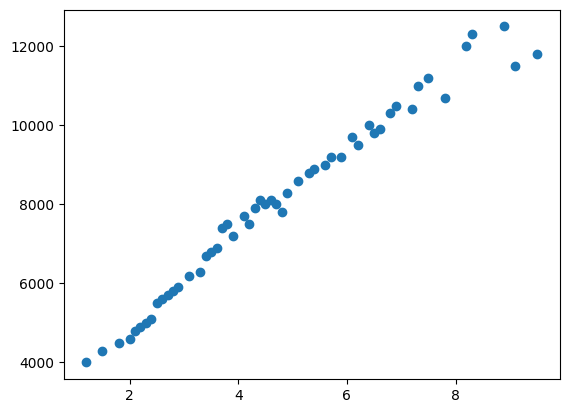

In [4]:
plt.scatter(X,Y)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics         import r2_score

ridge com o alpha igual ao 0 se torna uma regressão linear

In [6]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

X = StandardScaler().fit_transform(X.values.reshape(-1,1))
xtrain, xtest, ytrain, ytest = train_test_split(X,Y.values.reshape(-1,1),test_size=10,random_state=42)


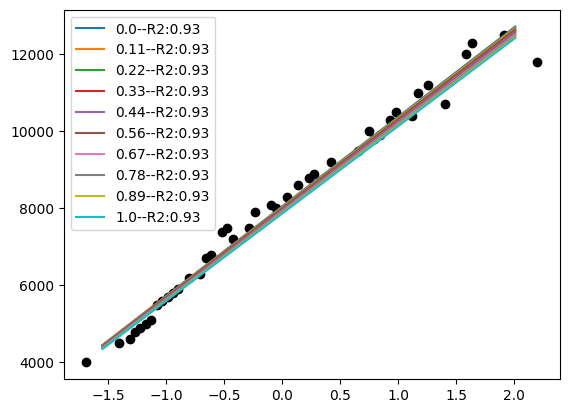

In [7]:
fig , ax = plt.subplots(1,1)
ax.scatter(xtrain[:,0],ytrain,c='black')
for i in np.linspace(0,1,10):
    ridge = RidgeRegressor(round(i,2),solver='normal')#
    ridge.fit(xtrain,ytrain)
    pred = ridge.predict(xtest)
    ax.plot(sorted(xtest[:,0]),sorted(pred),label=str(round(i,2))+"--R2:"+str(round(r2_score(ytest,pred),2)) )
    ax.legend()
plt.show()

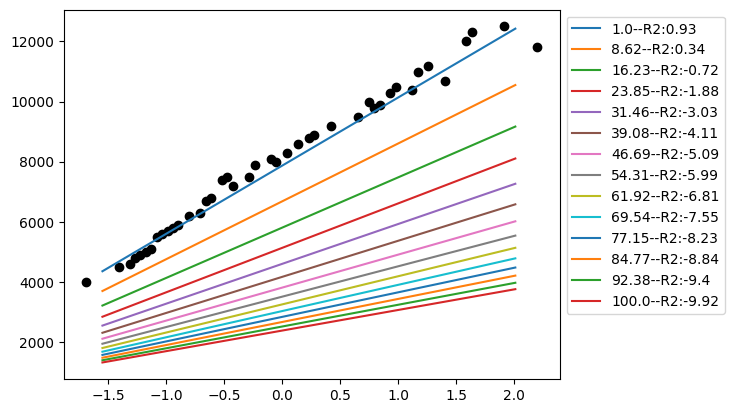

In [8]:
plt.scatter(xtrain[:,0],ytrain,c='black')
for i in np.linspace(1,100,14):
    ridge = RidgeRegressor(round(i,2),solver='normal')#
    ridge.fit(xtrain,ytrain)
    pred = ridge.predict(xtest)
    plt.plot(sorted(xtest[:,0]),sorted(pred),label=str(round(i,2))+"--R2:"+str(round(r2_score(ytest,pred),2)) )
plt.legend(bbox_to_anchor=(1,1,0,0))

### Lasso 

In [9]:
from sklearn.base import RegressorMixin
from typing       import Literal
class LassoRegressor(RegressorMixin):
    theta = None
    def __init__(self,alpha = 0.1 ,eta = 0.1 ,maxIter = 1_000):
        self.alpha   = alpha
        self.eta     = eta
        self.maxIter = maxIter
        

    def condition(self,vetor):
        if np.any(np.isnan(vetor)):    return True
        if np.any(np.isinf(vetor)):    return True
        if np.any(np.isneginf(vetor)): return True
        if np.any(np.isposinf(vetor)): return True
        return False
    
    def sign(self,theta:np.array):
        theta[theta < 0 ] = -1
        theta[theta == 0] = 0
        theta[theta > 0 ] = 1
        print(theta)
        return theta
    
    def fit(self,X,y):
        
        m  = np.size(X,axis=0)
        Xb = np.c_[ np.ones((m,1)), X]
        self.theta = np.random.randn(np.size(Xb,axis=1),1)

        for iter in range(self.maxIter):
            gradient = Xb.T.dot(Xb.dot(self.theta) - y)
            gradient = (gradient) + self.alpha * self.sign(self.theta) 
                    
            if self.condition(gradient) :break

            self.theta = self.theta - self.eta * gradient 
                    
            if self.condition(self.theta):break

    def predict(self,X):   
        soma = 0  
        tam  = np.size(X,axis=1)
        if (tam > 1):
            for i in range(tam):
                soma += self.theta[i+1] * X[:,i] 
            return self.theta[0] + soma
        return self.theta[0] + self.theta[1] * X

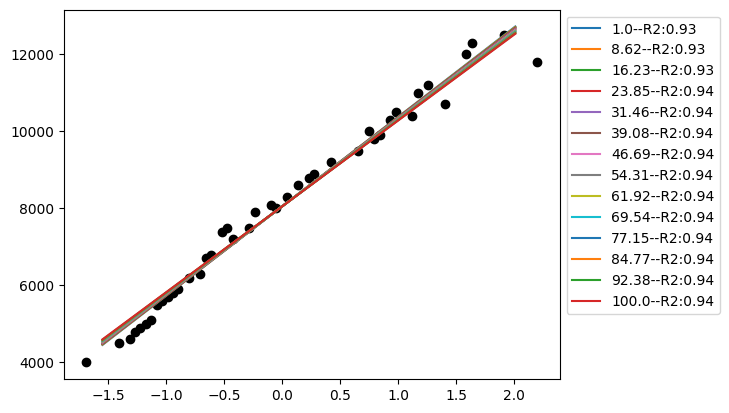

In [10]:
from sklearn.linear_model import Lasso
plt.scatter(xtrain[:,0],ytrain,c='black')
for i in np.linspace(1,100,14):
    ridge = Lasso(alpha=i)#
    ridge.fit(xtrain,ytrain)
    pred = ridge.predict(xtest)
    plt.plot(sorted(xtest[:,0]),sorted(pred),label=str(round(i,2))+"--R2:"+str(round(r2_score(ytest,pred),2)) )
plt.legend(bbox_to_anchor=(1,1,0,0))

&nbsp;

Sklearn

In [11]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.datasets     import make_regression

X, y = make_regression(n_samples=1_000, n_features=20)
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
lasso = Lasso(alpha=0.1)
lasso.fit(xtrain,ytrain,)

print('Coeficiente Angular  \n',lasso.coef_)
print('INterceptor          \n',lasso.intercept_)

Coeficiente Angular  
 [ 0.61888897 82.19976202  0.          0.         -0.         -0.
 18.90648661 69.71989237  0.         31.57466262 22.69362274  0.
  0.         76.6215765  98.37857987  0.         -0.         -0.
 61.602495   17.55575276]
INterceptor          
 0.015737132773530504


Ridge

In [18]:
ridge = Ridge(alpha=1)
ridge.fit(xtrain,ytrain,)

print('Coeficiente Angular  \n',ridge.coef_)
print('INterceptor          \n',ridge.intercept_)

Coeficiente Angular  
 [ 7.19480584e-01  8.21992954e+01  1.52646817e-02  7.67075764e-03
 -2.08200037e-03 -5.97354355e-03  1.89860358e+01  6.97338003e+01
 -6.57882632e-03  3.16348734e+01  2.27714011e+01  4.22034316e-03
 -3.04971503e-05  7.66192892e+01  9.83536416e+01 -2.25739159e-03
 -1.14961684e-02 -1.86631793e-02  6.16227323e+01  1.76337894e+01]
INterceptor          
 0.015023843664952352


In [14]:
from sklearn.linear_model import SGDClassifier
SGDClassifier(penalty='')

SGDClassifier(penalty='')